# King County Dataset Linear Regression Model 1

### In this model I will try to include just about everything!

In [1]:
import pandas as pd
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [12]:
# This one is getting stuck on the "date" being an object.
X = data
y = pd.DataFrame(data, columns = ['price'])

In [19]:
 # This one it's getting stuck on the "NaN's" (got rid of 'date' and 'sqft_basement')
X = data.drop(["date","sqft_basement"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [20]:
 # This one it's getting stuck on the "NaN's" (also got ride of 'waterfront' and 'yr_renovated')
X = data.drop(["date","sqft_basement", "view", "waterfront", "yr_renovated"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [21]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [22]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [36]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 1.600766667649311e-20
Test Mean Squarred Error: 1.8023641634519464e-20


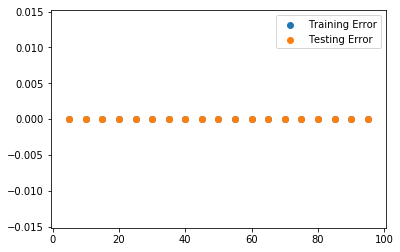

In [33]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~ id+bedrooms+bathrooms+sqft_living+sqft_lot+floors+grade+sqft_above+yr_built+zipcode+lat+long+sqft_living15+sqft_lot15"
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2980.
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:19:29   Log-Likelihood:            -2.9577e+05
No. Observations:               21597   AIC:                         5.916e+05
Df Residuals:                   21582   BIC:                         5.917e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.073e+06   3.07e+06      0.350      0.727   -4.94e+06    7.09e+06
id            -1.044e-06   5.14e-07     -2.031      0.042   -2.05e-06   -3.65e-08
bedrooms      -4.585e+04   2011.784    -22.788      0.000   -4.98e+04   -4.19e+04
bathrooms      4.897e+04   3448.470     14.200      0.000    4.22e+04    5.57e+04
sqft_living     182.7386      4.615     39.597      0.000     173.693     191.784
sqft_lot          0.1382      0.051      2.703      0.007       0.038       0.238
floors         1.007e+04   3824.985      2.633      0.008    2574.064    1.76e+04
grade          1.036e+05   2294.008     45.168      0.000    9.91e+04    1.08e+05
sqft_above        3.3470      4.569      0.733      0.464      -5.609      12.303
yr_built      -3285.6978     69.939    -46.979      0.000   -3422.784   -3148.612
zipcode        -524.1817     34.810    -15.058      0.000    -592.412    -455.951
lat            5.445e+05   1.14e+04     47.908      0.000    5.22e+05    5.67e+05
long          -2.475e+05    1.4e+04    -17.657      0.000   -2.75e+05    -2.2e+05
sqft_living15    37.1765      3.626     10.253      0.000      30.069      44.284
sqft_lot15       -0.3228      0.078     -4.120      0.000      -0.476      -0.169
==============================================================================
Omnibus:                    19325.252   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1875811.396
Skew:                           3.907   Prob(JB):                         0.00
Kurtosis:                      47.983   Cond. No.                     1.14e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-2.285384494754971e-19

Well my R^2 value looks good but somehow the cross validation didn't come out so great and neither did my RME's. Plus the P>|5| have a few out of range. My train-test split looks as if it is "over-predicting" since I can't even see the blue dots on the graph.